In [3]:
import pyteomics
import lxml
from pyteomics import mzml, mass
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
from scipy.stats import pearsonr, spearmanr, linregress
import matplotlib
import seaborn as sns

In [ ]:
fileslist = []
dir = 'D:\\yuming\\2022\\20221202\\mzml_tsim'
for file in os.listdir(dir):
    if file.endswith(".mzML"):
        fileslist.append(os.path.join(dir, file))
print(fileslist)

In [ ]:
# find the mzml files for each dilution 
mzmls_1= [x for x in fileslist if 'QL1' in x]
mzmls_2= [x for x in fileslist if 'QL2' in x]
mzmls_3= [x for x in fileslist if 'QL3' in x]
mzmls_4= [x for x in fileslist if 'QL4' in x]
mzmls_5= [x for x in fileslist if 'QL5' in x]
mzmls_6= [x for x in fileslist if 'QL6' in x]


In [6]:
mzmls_5

['D:\\yuming\\2022\\20221202\\mzml_tsim\\QL5_20221202183231.mzML',
 'D:\\yuming\\2022\\20221202\\mzml_tsim\\QL5_20221202220308.mzML',
 'D:\\yuming\\2022\\20221202\\mzml_tsim\\QL5.mzML']

In [7]:
def Average(lst):
    return sum(lst) / len(lst)

In [8]:
def getlipid_inten_aver(mzmls=mzmls_0,num=0,name='QL0'):
    tmp_00= pyteomics.mzml.read(mzmls[num], use_index=True)
    sum_711=[]
    sum_738=[]
    sum_753=[]
    sum_529=[]
    sum_781=[]
    # change the numbers below if your lipid scans are different
    for i in range(50,280):
        if (float(tmp_00.get_by_index(i)['base peak m/z'])>710) & (float(tmp_00.get_by_index(i)['base peak m/z'])<713):
            sum_711.append(int(tmp_00.get_by_index(i)['base peak intensity']))
        if (float(tmp_00.get_by_index(i)['base peak m/z'])>737) & (float(tmp_00.get_by_index(i)['base peak m/z'])<740):
            sum_738.append(int(tmp_00.get_by_index(i)['base peak intensity']))
        if (float(tmp_00.get_by_index(i)['base peak m/z'])>753) & (float(tmp_00.get_by_index(i)['base peak m/z'])<755):
            sum_753.append(int(tmp_00.get_by_index(i)['base peak intensity']))
        if (float(tmp_00.get_by_index(i)['base peak m/z'])>527) & (float(tmp_00.get_by_index(i)['base peak m/z'])<530):
            sum_529.append(int(tmp_00.get_by_index(i)['base peak intensity'])) 
        if (float(tmp_00.get_by_index(i)['base peak m/z'])>780) & (float(tmp_00.get_by_index(i)['base peak m/z'])<783):
            sum_781.append(int(tmp_00.get_by_index(i)['base peak intensity']))  
            
    lipid_name=['lipid_711','lipid_738','lipid_753','lipid_781','lipid_529']
    lipid_intensity=[Average(sum_711),Average(sum_738),Average(sum_753),Average(sum_781),Average(sum_529)]
    
    dict_lipid = {'lipid_name':lipid_name,'%s' % str(name):lipid_intensity}
    df=pd.DataFrame(dict_lipid)
    df.set_index('lipid_name',inplace=True)
    return(df)

In [9]:
getlipid_inten_aver(mzmls=mzmls_1,num=0,name='QL1')

,QL1
lipid_name,
lipid_711,1.063858e+05
lipid_738,2.698471e+05
lipid_753,2.301432e+06
lipid_781,2.473574e+04
lipid_529,6.156226e+05


In [10]:
df_QL1=pd.concat([getlipid_inten_aver(mzmls=mzmls_1,num=0,name='QL1_1'),
                  getlipid_inten_aver(mzmls=mzmls_1,num=1,name='QL1_2'),
                  getlipid_inten_aver(mzmls=mzmls_1,num=2,name='QL1_3')], axis=1)

In [11]:
df_QL2=pd.concat([getlipid_inten_aver(mzmls=mzmls_2,num=0,name='QL2_1'),
                  getlipid_inten_aver(mzmls=mzmls_2,num=1,name='QL2_2'),
                  getlipid_inten_aver(mzmls=mzmls_2,num=2,name='QL2_3')], axis=1)

In [12]:
df_QL3=pd.concat([getlipid_inten_aver(mzmls=mzmls_3,num=0,name='QL3_1'),
                  getlipid_inten_aver(mzmls=mzmls_3,num=1,name='QL3_2'),
                  getlipid_inten_aver(mzmls=mzmls_3,num=2,name='QL3_3')], axis=1)

In [13]:
df_QL4=pd.concat([getlipid_inten_aver(mzmls=mzmls_4,num=0,name='QL4_1'),
                  getlipid_inten_aver(mzmls=mzmls_4,num=1,name='QL4_2'),
                  getlipid_inten_aver(mzmls=mzmls_4,num=2,name='QL4_3')], axis=1)
df_QL5=pd.concat([getlipid_inten_aver(mzmls=mzmls_5,num=0,name='QL5_1'),
                  getlipid_inten_aver(mzmls=mzmls_5,num=1,name='QL5_2'),
                  getlipid_inten_aver(mzmls=mzmls_5,num=2,name='QL5_3')], axis=1)
df_QL6=pd.concat([getlipid_inten_aver(mzmls=mzmls_6,num=0,name='QL6_1'),
                  getlipid_inten_aver(mzmls=mzmls_6,num=1,name='QL6_2'),
                  getlipid_inten_aver(mzmls=mzmls_6,num=2,name='QL6_3')], axis=1)

In [14]:
df_all=pd.concat([df_QL1,df_QL2,df_QL3,df_QL4,df_QL5,df_QL6],axis=1)

In [15]:
new_df=df_all.T

In [16]:
new_df
new_dflog2=np.log2(new_df)

In [17]:
new_dflog2['type']=[75]*3+[18.75]*3+[4.6875]*3+[0.171875]*3+['QL5']*3+['QL6']*3

In [ ]:
#new_dflog2['type']=['QL1']*3+['QL2']*3+['QL3']*3+['QL4']*3+['QL5']*3+['QL6']*3

In [18]:
AA=['QL1','QL2','QL3','QL4','QL5','QL6']

In [ ]:
new_dflog2

In [20]:
plt738=[new_dflog2.iloc[:3,:5].mean().tolist()[1],new_dflog2.iloc[3:6,:5].mean().tolist()[1],
new_dflog2.iloc[6:9,:5].mean().tolist()[1],new_dflog2.iloc[9:12,:5].mean().tolist()[1],
new_dflog2.iloc[12:15,:5].mean().tolist()[1],new_dflog2.iloc[15:18,:5].mean().tolist()[1]]



In [21]:
plt753=[new_dflog2.iloc[:3,:5].mean().tolist()[2],new_dflog2.iloc[3:6,:5].mean().tolist()[2],
new_dflog2.iloc[6:9,:5].mean().tolist()[2],new_dflog2.iloc[9:12,:5].mean().tolist()[2],
new_dflog2.iloc[12:15,:5].mean().tolist()[2],new_dflog2.iloc[15:18,:5].mean().tolist()[2]]



In [22]:
plt529=[new_dflog2.iloc[:3,:5].mean().tolist()[4],new_dflog2.iloc[3:6,:5].mean().tolist()[4],
new_dflog2.iloc[6:9,:5].mean().tolist()[4],new_dflog2.iloc[9:12,:5].mean().tolist()[4],
new_dflog2.iloc[12:15,:5].mean().tolist()[4],new_dflog2.iloc[15:18,:5].mean().tolist()[4]]


In [23]:
new_dflog2.T

,QL1_1,QL1_2,QL1_3,QL2_1,QL2_2,QL2_3,QL3_1,QL3_2,QL3_3,QL4_1,QL4_2,QL4_3,QL5_1,QL5_2,QL5_3,QL6_1,QL6_2,QL6_3
lipid_name,,,,,,,,,,,,,,,,,,
lipid_711,16.698945,17.309041,16.742011,16.706317,16.912474,16.726297,18.305586,18.357415,18.125841,19.89917,19.912437,19.692157,20.708372,20.737457,21.127072,21.675541,21.709586,21.520163
lipid_738,18.041783,18.209729,17.498298,19.882752,20.290233,20.085928,21.937131,21.997125,21.791923,23.627805,23.590793,23.445392,24.553363,24.615318,25.0877,25.824491,25.830112,25.687142
lipid_753,21.1341,20.924999,20.697808,22.88145,23.314568,23.203254,25.302841,25.349738,25.228366,27.089847,27.018525,26.942069,28.028371,28.143199,28.587625,29.331156,29.247366,29.078562
lipid_781,14.594309,19.249958,17.586158,16.769641,14.743697,14.768141,15.62237,15.663781,15.448715,17.751604,17.826081,17.723593,19.191574,19.246968,19.67181,20.430431,20.309295,20.078857
lipid_529,19.231687,19.511097,18.972948,21.449759,21.74629,21.55099,23.911407,23.891671,23.757046,26.033271,25.908418,25.802755,27.27137,27.159159,27.679777,28.623869,28.522507,28.004541
type,QL1,QL1,QL1,QL2,QL2,QL2,QL3,QL3,QL3,QL4,QL4,QL4,QL5,QL5,QL5,QL6,QL6,QL6


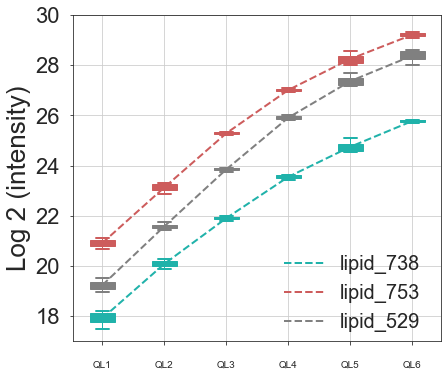

In [23]:


sns.set_style("ticks")
matplotlib.rcParams['font.family'] = "Arial"
plt.figure(figsize=(6.6, 6))
sns.boxplot(x = 'type', y = 'lipid_738',data = new_dflog2,orient='v',color="lightseagreen", boxprops=dict(facecolor="lightseagreen",edgecolor='lightseagreen',linewidth=1), 
            whiskerprops=dict(color="lightseagreen",linewidth=1), medianprops=dict(color="lightseagreen",linewidth=1), width=0.4,fliersize=3,
           flierprops=dict(markerfacecolor="lightseagreen", marker="."),capprops=dict(linewidth=2, color='lightseagreen'))
sns.boxplot(x = 'type', y = 'lipid_753',data = new_dflog2,orient='v',color="indianred", boxprops=dict(facecolor="indianred",edgecolor='indianred',linewidth=1), 
            whiskerprops=dict(color="indianred",linewidth=1), medianprops=dict(color="indianred",linewidth=1), width=0.4,fliersize=3,
           flierprops=dict(markerfacecolor="indianred", marker="."),capprops=dict(linewidth=2, color='indianred'))
#sns.boxplot(x = 'type', y = 'lipid_781',data = new_dflog2,linewidth=2.5)
sns.boxplot(x = 'type', y = 'lipid_529',data = new_dflog2,orient='v',color="grey", boxprops=dict(facecolor="grey",edgecolor='grey',linewidth=1), 
            whiskerprops=dict(color="grey",linewidth=1), medianprops=dict(color="grey",linewidth=1), width=0.4,fliersize=3,
           flierprops=dict(markerfacecolor="grey", marker="."),capprops=dict(linewidth=2, color='grey') )

plt.plot(AA,plt738,color='lightseagreen', linestyle='--',label='d18:1-18:1(d9) SM',linewidth=2)
plt.plot(AA,plt753,color='indianred', linestyle='--',label='15:0-18:1(d7) PC',linewidth=2)
plt.plot(AA,plt529,color='grey', linestyle='--',label='18:1(d7)Lyso PC',linewidth=2)
plt.ylabel('Log 2 (intensity)',fontsize=26)

plt.tick_params(axis='x', which='major', pad=16)
plt.tick_params(axis='y', which='major', pad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=22)
plt.xlabel('')
plt.ylim(17,30)
plt.legend(fontsize=20,loc=(0.55, 0.005),frameon=False)
plt.grid()
plt.savefig('D:\\project7_SMAD\\figure2\\Figure2_I.svg', dpi=800,bbox_inches = 'tight')
plt.show()

In [24]:
def getlipid_inten_all(mzmls=mzmls_0,num=0,name='QL0'):
    tmp_00= pyteomics.mzml.read(mzmls[num], use_index=True)
    sum_711=[]
    sum_738=[]
    sum_753=[]
    sum_529=[]
    sum_781=[]
    # change the numbers below if your lipid scans are different
    for i in range(50,300):
        if (float(tmp_00.get_by_index(i)['base peak m/z'])>710) & (float(tmp_00.get_by_index(i)['base peak m/z'])<713):
            sum_711.append(int(tmp_00.get_by_index(i)['base peak intensity']))
        if (float(tmp_00.get_by_index(i)['base peak m/z'])>737) & (float(tmp_00.get_by_index(i)['base peak m/z'])<740):
            sum_738.append(int(tmp_00.get_by_index(i)['base peak intensity']))
        if (float(tmp_00.get_by_index(i)['base peak m/z'])>753) & (float(tmp_00.get_by_index(i)['base peak m/z'])<754):
            sum_753.append(int(tmp_00.get_by_index(i)['base peak intensity']))
        if (float(tmp_00.get_by_index(i)['base peak m/z'])>527) & (float(tmp_00.get_by_index(i)['base peak m/z'])<530):
            sum_529.append(int(tmp_00.get_by_index(i)['base peak intensity'])) 
        if (float(tmp_00.get_by_index(i)['base peak m/z'])>780) & (float(tmp_00.get_by_index(i)['base peak m/z'])<783):
            sum_781.append(int(tmp_00.get_by_index(i)['base peak intensity']))  
    dict_lipid={'lipid_711':sum_711,'lipid_738':sum_738,'lipid_753':sum_753,'lipid_781':sum_781,'lipid_529':sum_529}
    df = pd.DataFrame.from_dict(dict_lipid, orient='index')
    df = df.transpose()
    return(df)
def dict_lipinten_all(mzmls=mzmls_0,num=0,name='QL0'):
    tmp_00= pyteomics.mzml.read(mzmls[num], use_index=True)
    sum_711=[]
    sum_738=[]
    sum_753=[]
    sum_529=[]
    sum_781=[]
    # change the numbers below if your lipid scans are different
    for i in range(50,300):
        if (float(tmp_00.get_by_index(i)['base peak m/z'])>710) & (float(tmp_00.get_by_index(i)['base peak m/z'])<713):
            sum_711.append(int(tmp_00.get_by_index(i)['base peak intensity']))
        if (float(tmp_00.get_by_index(i)['base peak m/z'])>737) & (float(tmp_00.get_by_index(i)['base peak m/z'])<740):
            sum_738.append(int(tmp_00.get_by_index(i)['base peak intensity']))
        if (float(tmp_00.get_by_index(i)['base peak m/z'])>753) & (float(tmp_00.get_by_index(i)['base peak m/z'])<754):
            sum_753.append(int(tmp_00.get_by_index(i)['base peak intensity']))
        if (float(tmp_00.get_by_index(i)['base peak m/z'])>527) & (float(tmp_00.get_by_index(i)['base peak m/z'])<530):
            sum_529.append(int(tmp_00.get_by_index(i)['base peak intensity'])) 
        if (float(tmp_00.get_by_index(i)['base peak m/z'])>780) & (float(tmp_00.get_by_index(i)['base peak m/z'])<783):
            sum_781.append(int(tmp_00.get_by_index(i)['base peak intensity']))  
    dict_lipid={'lipid_711':sum_711,'lipid_738':sum_738,'lipid_753':sum_753,'lipid_781':sum_781,'lipid_529':sum_529}
    return(dict_lipid)

# quantification of QCAL standards starts from this cell

In [25]:
# set the m/z for each target peptide of QCAL proteins 

peptide_list=[525.84,721.84,802.84,749.82,778.32,634.33,671.80,707.30,721.30,737.32]

In [26]:
seq_list=['ALVALVLVPR',
'VLYPNDNFFEGK',
'AVMMMDDFAAFVEK',
'GGVNDNEEGFFSAR',
'GGGVNDNEEGFFSAR',
'YLGYLEQLLR',
'AVMDDFAAFVEK',
'GVNDNEEGFFSAK',
'GVNDNEEGFFSAR',
'AVMMDDFAAFVEK',]

In [27]:
# define a function to get theoretical fragments and its corresponding m/z from a peptide sequence 

def getfrag(sequence = 'DRVYIHPFHL' ):
    customAAcomp = dict(mass.std_aa_comp)
    customAAcomp['C'] = mass.Composition({'H':8, 'C':5, 'S':1,'O':2, 'N': 2}) ## add carbamidomethyl to the modifications
    customAAcomp['m'] = mass.Composition({'H': 9, 'C': 5, 'S': 1, 'O': 2, 'N': 1}) ## add oxidized methionine
    protonmass = mass.calculate_mass(formula='H')-0.00054858 ## mass of hydrogen minus an electron  
    # clean sequence to remove mod masses and change oxMet to 'm'
    fraglist=[]
    z=1
    for x in range(1, len(sequence)-1):
        fragseq_y = sequence[x:]
        fragseq_b = sequence[:x]
        lightfragmz_y = mass.calculate_mass(sequence=sequence[x:], ion_type='y', charge=1, aa_comp = customAAcomp)
        lightfragmz_b = mass.calculate_mass(sequence=sequence[:x], ion_type='b', charge=1, aa_comp = customAAcomp)
        ## part to count the number of K and R residues
        fraglist.append([fragseq_y, lightfragmz_y,fragseq_b,lightfragmz_b])   
    return(fraglist)
# to extract the int values between two other values,  the value range was set according to ppm 
def getFragInt(pred_mass, mz_list, int_list, tol, tol_type):
    ''' 
    PURPOSE:
    Find observed intensity for theoretical m/z value in spectra
    
    INPUTS:
    pred_mass = the theoretical mass of the fragment ion
    mz_array = numpy array of all peak masses in the spectra
    int_array = numpy array of all peak intensities in the spectra
    ppm = the mass tolerance for the fragments in ppm
    noiselevel = value to be subtracted from each value
    
    OUTPUTS:
    numpy array containing the intensity for any m/z found
    
    '''
    if tol_type=="ppm":
        lowmz = pred_mass - pred_mass*tol
        highmz = pred_mass + pred_mass*tol
    if tol_type == "abs":
        lowmz = pred_mass - tol
        highmz = pred_mass + tol
    found = [int_list[index] for index, value in enumerate(mz_list) if value>lowmz and value<highmz]
    #found = found-noiselevel
    if len(found)==0:
        found = [1]
    return(found[0])
customAAcomp = dict(mass.std_aa_comp)
customAAcomp['C'] = mass.Composition({'H':8, 'C':5, 'S':1,'O':2, 'N': 2}) ## add carbamidomethyl to the modifications
customAAcomp['m'] = mass.Composition({'H': 9, 'C': 5, 'S': 1, 'O': 2, 'N': 1}) ## add oxidized methionine
protonmass = mass.calculate_mass(formula='H')-0.00054858 ## mass of hydrogen minus an electron

In [28]:
# get the m/z list of y fragments
def yion_mz(tmp_pep=seq_list[0]):
    fraglist = []
    z=1
    for x in range(1, len(tmp_pep)-1):
        fragseq = tmp_pep[x:]
        lightfragmz = mass.calculate_mass(sequence=tmp_pep[x:], ion_type='y', charge=1, aa_comp = customAAcomp)
        ## part to count the number of K and R residues
        fraglist.append([fragseq, lightfragmz])
    fl = pd.DataFrame(fraglist)
    fl.columns = ['fragseq', 'lightmz']
    return(fl)

In [29]:
# take the aveage intensity of the ten peptides in each file

def get_qcal_inten(files=mzmls_1,listnum=0):
    tmp11 = pyteomics.mzml.read(files[listnum], use_index=True)
    fragment_ions = {525.8: seq_list[0],721.8: seq_list[1],802.9: seq_list[2],
                     778.3: seq_list[3],749.8: seq_list[4],634.3: seq_list[5],
                     671.8: seq_list[6],707.3: seq_list[7],721.3: seq_list[8],
                     737.3: seq_list[9]}
    tol_type = "ppm"
    tol = 5e-6
    quan_lists = [[] for _ in range(10)]
    for number in range(320, 660):
        tmpmzarray = tmp11.get_by_index(number)["m/z array"].tolist()
        tmpintarray = tmp11.get_by_index(number)["intensity array"].tolist()
        precursor_mz = round(float(tmp11.get_by_index(number)["precursorList"]["precursor"][0]["selectedIonList"]["selectedIon"][0]["selected ion m/z"]), 1)
        if precursor_mz in fragment_ions:
            fragment_seq = fragment_ions[precursor_mz]
            ints = [getFragInt(x, tmpmzarray, tmpintarray, tol, tol_type) for x in yion_mz(tmp_pep=fragment_seq)["lightmz"]]
            quan_lists[list(fragment_ions.keys()).index(precursor_mz)].append(sum(ints))
    made=[]
    for i in range(10):
        made.append(sum(quan_lists[i])/len(quan_lists[i]))
       # Construct column name dynamically using string formatting
    column_name = 's{}'.format(files[listnum])
    dict_new={'sequence': seq_list, column_name: made}
    df = pd.DataFrame(dict_new)
    df.set_index('sequence',inplace=True)
    return(df)

In [30]:
get_qcal_inten(files=mzmls_5,listnum=0)

,sD:\yuming\2022\20221202\mzml_tsim\QL5_20221202183231.mzML
sequence,
ALVALVLVPR,2.600199e+07
VLYPNDNFFEGK,3.718435e+06
AVMMMDDFAAFVEK,3.166851e+06
GGVNDNEEGFFSAR,6.460419e+06
GGGVNDNEEGFFSAR,6.229112e+06
YLGYLEQLLR,1.743328e+07
AVMDDFAAFVEK,8.856781e+06
GVNDNEEGFFSAK,3.786812e+06
GVNDNEEGFFSAR,3.606052e+06


In [31]:
qcal_df=pd.concat([get_qcal_inten(files=mzmls_1,listnum=0),get_qcal_inten(files=mzmls_1,listnum=1),get_qcal_inten(files=mzmls_1,listnum=2),
          get_qcal_inten(files=mzmls_2,listnum=0),get_qcal_inten(files=mzmls_2,listnum=1),get_qcal_inten(files=mzmls_2,listnum=2),
          get_qcal_inten(files=mzmls_3,listnum=0),get_qcal_inten(files=mzmls_3,listnum=1),get_qcal_inten(files=mzmls_3,listnum=2),
          get_qcal_inten(files=mzmls_4,listnum=0),get_qcal_inten(files=mzmls_4,listnum=1),get_qcal_inten(files=mzmls_4,listnum=2),
          get_qcal_inten(files=mzmls_5,listnum=0),get_qcal_inten(files=mzmls_5,listnum=1),get_qcal_inten(files=mzmls_5,listnum=2),
          get_qcal_inten(files=mzmls_6,listnum=0),get_qcal_inten(files=mzmls_6,listnum=1),get_qcal_inten(files=mzmls_6,listnum=2)], axis=1)
        
            

In [32]:
qcal=qcal_df.T
qcal_log2=np.log2(qcal)

In [33]:
qcal_log2.iloc[:3,:].sem().tolist()[0]

0.3848100240968856

In [34]:
def listmean(i=0):  
    qcal=[qcal_log2.iloc[:3,:].mean().tolist()[i],
    qcal_log2.iloc[3:6,:].mean().tolist()[i],
    qcal_log2.iloc[6:7,:].mean().tolist()[i],
    qcal_log2.iloc[9:12,:].mean().tolist()[i],
    qcal_log2.iloc[12:15,:].mean().tolist()[i],
    qcal_log2.iloc[15:18,:].mean().tolist()[i]]
    return(qcal)
def listerror(i=0):  
    qcal=[qcal_log2.iloc[:3,:].sem().tolist()[i],
    qcal_log2.iloc[3:6,:].sem().tolist()[i],
    qcal_log2.iloc[6:7,:].sem().tolist()[i],
    qcal_log2.iloc[9:12,:].sem().tolist()[i],
    qcal_log2.iloc[12:15,:].sem().tolist()[i],
    qcal_log2.iloc[15:18,:].sem().tolist()[i]]
    return(qcal)

In [35]:
listmean(i=2)

[14.23287814066545,
 15.816932716313339,
 18.299424354561847,
 20.100979319856563,
 21.481613244274996,
 21.93796129140433]

In [ ]:
AA=['QL1','QL2','QL3','QL4','QL5','QL6']

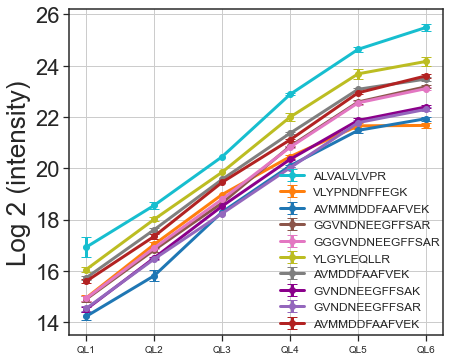

In [37]:
from matplotlib import pyplot
import matplotlib
import seaborn as sns
from matplotlib.font_manager import FontProperties
sns.set_theme(style="ticks")
plt.figure(figsize=(6.7,6),edgecolor="#04253a")
matplotlib.rcParams['font.family'] = "Arial"

matplotlib.rcParams['axes.linewidth'] = 1.5



plt.errorbar(AA,listmean(i=0),yerr=listerror(i=0),color='tab:cyan',label=seq_list[0],marker='o',linewidth=3,capsize=5)
plt.errorbar(AA,listmean(i=1),yerr=listerror(i=1),color='tab:orange',label=seq_list[1],marker='o',linewidth=3,capsize=5)
plt.errorbar(AA,listmean(i=2),yerr=listerror(i=2),color='tab:blue',label=seq_list[2],marker='o',linewidth=3,capsize=5)
plt.errorbar(AA,listmean(i=3),yerr=listerror(i=3),color='tab:brown',label=seq_list[3],marker='o',linewidth=3,capsize=5)
plt.errorbar(AA,listmean(i=4),yerr=listerror(i=4),color='tab:pink',label=seq_list[4],marker='o',linewidth=3,capsize=5)
plt.errorbar(AA,listmean(i=5),yerr=listerror(i=5),color='tab:olive',label=seq_list[5],marker='o',linewidth=3,capsize=5)
plt.errorbar(AA,listmean(i=6),yerr=listerror(i=6),color='tab:gray',label=seq_list[6],marker='o',linewidth=3,capsize=5)
plt.errorbar(AA,listmean(i=7),yerr=listerror(i=7),color='darkmagenta',label=seq_list[7],marker='o',linewidth=3,capsize=5)
plt.errorbar(AA,listmean(i=8),yerr=listerror(i=8),color='tab:purple',label=seq_list[8],marker='o',linewidth=3,capsize=5)
plt.errorbar(AA,listmean(i=9),yerr=listerror(i=9),color='firebrick',label=seq_list[9],marker='o',linewidth=3,capsize=5)

plt.legend(fontsize=12,loc=(0.55, 0.005),frameon=False)
plt.ylabel('Log 2 (intensity)',fontsize=26)
plt.xticks(fontsize=10)
plt.yticks(fontsize=22)
plt.grid()

plt.savefig('D:\\project7_SMAD\\figure2\\Figure2_H.svg', dpi=800,bbox_inches = 'tight')
